# **Proyek Klasifikasi Gambar: Plant Disesease**
- **Nama:** Fadhilah Nurrahmayanti
- **Email:** a117xbm150@devacademy.id
- **ID Dicoding:** dilaafn
- **Source:** https://www.kaggle.com/datasets/utkarshsaxenadn/fast-food-classification-dataset

# **Import Library**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.lite as tflite
import zipfile
import shutil

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import files

# **Data Preparation**

In [2]:
with zipfile.ZipFile('fastfoodClassification.zip', 'r') as zip_ref:
  zip_ref.extractall('./')

# **Data Loading**

In [3]:
def print_images_resolution(directory):
  unique_sizes = set()
  total_images = 0

  for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if not os.path.isdir(subdir_path):
      continue
    image_files = os.listdir(subdir_path)
    num_images = len(image_files)
    print(f"{subdir}: {num_images} gambar")
    total_images += num_images

    for img_file in image_files:
      img_path = os.path.join(subdir_path, img_file)
      try:
        with Image.open(img_path) as img:
          unique_sizes.add(img.size)
      except Exception as e:
        print(f"Error membuka {img_path}: {e}")

    print("Resolusi unik:")
    for size in unique_sizes:
      print(f"- {size}")
    print("---------------")

  return total_images

total_images = print_images_resolution(directory='.')

print(f"\nTotal gambar: {total_images}")

.config: 10 gambar
Error membuka ./.config/.last_opt_in_prompt.yaml: cannot identify image file './.config/.last_opt_in_prompt.yaml'
Error membuka ./.config/active_config: cannot identify image file './.config/active_config'
Error membuka ./.config/config_sentinel: cannot identify image file './.config/config_sentinel'
Error membuka ./.config/.last_survey_prompt.yaml: cannot identify image file './.config/.last_survey_prompt.yaml'
Error membuka ./.config/configurations: [Errno 21] Is a directory: './.config/configurations'
Error membuka ./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db: cannot identify image file './.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db'
Error membuka ./.config/logs: [Errno 21] Is a directory: './.config/logs'
Error membuka ./.config/default_configs.db: cannot identify image file './.config/default_configs.db'
Error membuka ./.config/gce: cannot identify image file './.config/gce'
Error membuka ./.config/.last_upd

In [4]:
DATASET_PATH = 'fastfoodClassification'

In [5]:
print("Cek resolusi gambar pada folder 'test':")
print_images_resolution(os.path.join(DATASET_PATH, 'test'))

Cek resolusi gambar pada folder 'test':
Crispy Chicken: 100 gambar
Resolusi unik:
- (205, 246)
- (183, 276)
- (225, 224)
- (318, 159)
- (224, 225)
- (201, 251)
- (149, 338)
- (187, 270)
- (212, 238)
- (310, 163)
- (183, 275)
- (300, 168)
- (337, 150)
- (204, 246)
- (259, 194)
- (299, 169)
- (191, 264)
- (280, 180)
- (267, 189)
- (224, 224)
- (194, 259)
- (278, 182)
- (235, 214)
- (225, 225)
- (299, 168)
- (275, 183)
- (251, 201)
---------------
Taco: 100 gambar
Resolusi unik:
- (281, 180)
- (205, 246)
- (183, 276)
- (225, 224)
- (318, 159)
- (224, 225)
- (201, 251)
- (149, 338)
- (187, 270)
- (212, 238)
- (194, 260)
- (173, 292)
- (310, 163)
- (183, 275)
- (300, 168)
- (337, 150)
- (204, 246)
- (259, 194)
- (299, 169)
- (211, 239)
- (191, 264)
- (195, 258)
- (280, 180)
- (267, 189)
- (221, 228)
- (224, 224)
- (257, 196)
- (194, 259)
- (278, 182)
- (279, 181)
- (235, 214)
- (220, 229)
- (225, 225)
- (299, 168)
- (275, 183)
- (251, 201)
---------------
Sandwich: 200 gambar
Resolusi unik:

1500

In [6]:
print("Cek Resolusi Gambar pada Folder 'valid':")
print_images_resolution(os.path.join(DATASET_PATH + '/valid'))

Cek Resolusi Gambar pada Folder 'valid':
Crispy Chicken: 400 gambar
Resolusi unik:
- (204, 247)
- (206, 244)
- (243, 208)
- (315, 160)
- (225, 224)
- (167, 301)
- (190, 266)
- (202, 249)
- (201, 251)
- (186, 271)
- (276, 183)
- (199, 253)
- (259, 194)
- (185, 272)
- (174, 290)
- (266, 190)
- (267, 189)
- (272, 185)
- (252, 200)
- (258, 195)
- (299, 168)
- (262, 192)
- (291, 173)
- (246, 205)
- (251, 201)
- (260, 194)
- (193, 262)
- (308, 164)
- (234, 215)
- (281, 180)
- (318, 159)
- (293, 172)
- (232, 217)
- (325, 155)
- (310, 163)
- (188, 268)
- (224, 224)
- (327, 154)
- (187, 269)
- (276, 182)
- (220, 229)
- (225, 225)
- (275, 183)
- (261, 193)
- (177, 285)
- (218, 231)
- (273, 185)
- (255, 198)
- (183, 276)
- (286, 176)
- (277, 182)
- (195, 259)
- (197, 256)
- (269, 187)
- (181, 278)
- (311, 162)
- (244, 206)
- (213, 237)
- (193, 261)
- (194, 260)
- (300, 168)
- (165, 306)
- (317, 159)
- (168, 300)
- (332, 152)
- (259, 195)
- (216, 233)
- (268, 188)
- (159, 318)
- (215, 234)
- (183,

3500

In [7]:
print("Cek Resolusi Gambar pada Folder 'test':")
print_images_resolution(os.path.join(DATASET_PATH + '/test'))

Cek Resolusi Gambar pada Folder 'test':
Crispy Chicken: 100 gambar
Resolusi unik:
- (205, 246)
- (183, 276)
- (225, 224)
- (318, 159)
- (224, 225)
- (201, 251)
- (149, 338)
- (187, 270)
- (212, 238)
- (310, 163)
- (183, 275)
- (300, 168)
- (337, 150)
- (204, 246)
- (259, 194)
- (299, 169)
- (191, 264)
- (280, 180)
- (267, 189)
- (224, 224)
- (194, 259)
- (278, 182)
- (235, 214)
- (225, 225)
- (299, 168)
- (275, 183)
- (251, 201)
---------------
Taco: 100 gambar
Resolusi unik:
- (281, 180)
- (205, 246)
- (183, 276)
- (225, 224)
- (318, 159)
- (224, 225)
- (201, 251)
- (149, 338)
- (187, 270)
- (212, 238)
- (194, 260)
- (173, 292)
- (310, 163)
- (183, 275)
- (300, 168)
- (337, 150)
- (204, 246)
- (259, 194)
- (299, 169)
- (211, 239)
- (191, 264)
- (195, 258)
- (280, 180)
- (267, 189)
- (221, 228)
- (224, 224)
- (257, 196)
- (194, 259)
- (278, 182)
- (279, 181)
- (235, 214)
- (220, 229)
- (225, 225)
- (299, 168)
- (275, 183)
- (251, 201)
---------------
Sandwich: 200 gambar
Resolusi unik:

1500

In [8]:
total_train = sum([len(files) for r, d, files in os.walk(DATASET_PATH + '/train')])
total_val = sum([len(files) for r, d, files in os.walk(DATASET_PATH + '/valid')])
total_test = sum([len(files) for r, d, files in os.walk(DATASET_PATH + '/test')])

In [9]:
print(f"Total Data Latih: {total_train} Gambar")
print(f"Total Data Validasi: {total_val} Gambar")
print(f"Total Data Test: {total_test} Gambar")
print(f"Total Data Keseluruhan: {total_train + total_val + total_test} Gambar")

Total Data Latih: 15000 Gambar
Total Data Validasi: 3500 Gambar
Total Data Test: 1500 Gambar
Total Data Keseluruhan: 20000 Gambar


# **Data Preprocessing**

## Split Dataset

In [10]:
TARGET_SIZE = (150, 150)
BATCH_SIZE = 32

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'train'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 15000 images belonging to 10 classes.


In [13]:
valid_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = valid_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'valid'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 3500 images belonging to 10 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1500 images belonging to 10 classes.


## Modelling

In [15]:
model = Sequential([
    Input(shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    # Block 1
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Block 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Block 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Block 4
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,605,450 (13.75 MB)

 Trainable params: 3,603,978 (13.75 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [17]:
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model_revised.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [18]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
 47/469 ━━━━━━━━━━━━━━━━━━━━ 1:16 181ms/step - accuracy: 0.1448 - loss: 3.3008

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.1931 - loss: 2.9489
Epoch 1: val_accuracy improved from -inf to 0.28371, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 116s 224ms/step - accuracy: 0.1932 - loss: 2.9485 - val_accuracy: 0.2837 - val_loss: 2.0709
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.2842 - loss: 2.3668
Epoch 2: val_accuracy improved from 0.28371 to 0.41714, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - accuracy: 0.2842 - loss: 2.3666 - val_accuracy: 0.4171 - val_loss: 1.7907
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.3502 - loss: 2.1094
Epoch 3: val_accuracy improved from 0.41714 to 0.44657, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 206ms/step - accuracy: 0.3502 - loss: 2.1094 - val_accuracy: 0.4466 - val_loss: 1.8501
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.3875 - loss: 1.9444
Epoch 4: val_accuracy improved from 0.44657 to 0.47600, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.3875 - loss: 1.9444 - val_accuracy: 0.4760 - val_loss: 1.6470
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.4227 - loss: 1.8236
Epoch 5: val_accuracy did not improve from 0.47600
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.4227 - loss: 1.8236 - val_accuracy: 0.4534 - val_loss: 1.8187
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.4546 - loss: 1.6957
Epoch 6: val_accuracy improved from 0.47600 to 0.50200, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 206ms/step - accuracy: 0.4546 - loss: 1.6957 - val_accuracy: 0.5020 - val_loss: 1.5183
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.4820 - loss: 1.6031
Epoch 7: val_accuracy improved from 0.50200 to 0.55029, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.4820 - loss: 1.6031 - val_accuracy: 0.5503 - val_loss: 1.4871
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5090 - loss: 1.5228
Epoch 8: val_accuracy did not improve from 0.55029
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.5090 - loss: 1.5228 - val_accuracy: 0.4703 - val_loss: 1.8779
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.5244 - loss: 1.4457
Epoch 9: val_accuracy did not improve from 0.55029
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.5244 - loss: 1.4458 - val_accuracy: 0.4937 - val_loss: 1.6153
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5276 - loss: 1.4254
Epoch 10: val_accuracy did not improve from 0.55029
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.5276 - loss: 1.4253 - val_accuracy: 0.5403 - val_loss: 1.4610
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5605 - loss: 1.3445
Epoch 11

469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.5703 - loss: 1.3111 - val_accuracy: 0.5797 - val_loss: 1.3717
Epoch 14/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5862 - loss: 1.2534
Epoch 14: val_accuracy improved from 0.57971 to 0.61714, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.5862 - loss: 1.2534 - val_accuracy: 0.6171 - val_loss: 1.1973
Epoch 15/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6062 - loss: 1.2000
Epoch 15: val_accuracy did not improve from 0.61714
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.6062 - loss: 1.2000 - val_accuracy: 0.6054 - val_loss: 1.2651
Epoch 16/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.6087 - loss: 1.1918
Epoch 16: val_accuracy improved from 0.61714 to 0.62371, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.6087 - loss: 1.1918 - val_accuracy: 0.6237 - val_loss: 1.1728
Epoch 17/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.6185 - loss: 1.1710
Epoch 17: val_accuracy did not improve from 0.62371
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.6185 - loss: 1.1710 - val_accuracy: 0.5900 - val_loss: 1.3079
Epoch 18/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6250 - loss: 1.1652
Epoch 18: val_accuracy improved from 0.62371 to 0.63829, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.6250 - loss: 1.1652 - val_accuracy: 0.6383 - val_loss: 1.1418
Epoch 19/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6436 - loss: 1.1150
Epoch 19: val_accuracy did not improve from 0.63829
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.6436 - loss: 1.1150 - val_accuracy: 0.5549 - val_loss: 1.4972
Epoch 20/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6385 - loss: 1.0934
Epoch 20: val_accuracy did not improve from 0.63829
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.6385 - loss: 1.0934 - val_accuracy: 0.6229 - val_loss: 1.1660
Epoch 21/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.6531 - loss: 1.0655
Epoch 21: val_accuracy did not improve from 0.63829
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.6531 - loss: 1.0654 - val_accuracy: 0.6337 - val_loss: 1.1410
Epoch 22/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.6591 - loss: 1.0523
Epoc

469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.6591 - loss: 1.0523 - val_accuracy: 0.6406 - val_loss: 1.1344
Epoch 23/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.6676 - loss: 1.0190
Epoch 23: val_accuracy did not improve from 0.64057
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.6676 - loss: 1.0190 - val_accuracy: 0.6234 - val_loss: 1.2029
Epoch 24/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6668 - loss: 1.0023
Epoch 24: val_accuracy did not improve from 0.64057
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 205ms/step - accuracy: 0.6668 - loss: 1.0023 - val_accuracy: 0.6151 - val_loss: 1.1520
Epoch 25/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.6855 - loss: 0.9670
Epoch 25: val_accuracy improved from 0.64057 to 0.64086, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.6855 - loss: 0.9670 - val_accuracy: 0.6409 - val_loss: 1.1838
Epoch 26/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.6891 - loss: 0.9615
Epoch 26: val_accuracy did not improve from 0.64086
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.6891 - loss: 0.9615 - val_accuracy: 0.5746 - val_loss: 1.4990
Epoch 27/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.6886 - loss: 0.9526
Epoch 27: val_accuracy did not improve from 0.64086
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.6886 - loss: 0.9526 - val_accuracy: 0.6377 - val_loss: 1.1571
Epoch 28/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.6936 - loss: 0.9459
Epoch 28: val_accuracy improved from 0.64086 to 0.65257, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.6936 - loss: 0.9459 - val_accuracy: 0.6526 - val_loss: 1.1124
Epoch 29/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6964 - loss: 0.9324
Epoch 29: val_accuracy did not improve from 0.65257
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.6964 - loss: 0.9324 - val_accuracy: 0.6514 - val_loss: 1.1318
Epoch 30/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7037 - loss: 0.9076
Epoch 30: val_accuracy improved from 0.65257 to 0.65914, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.7036 - loss: 0.9077 - val_accuracy: 0.6591 - val_loss: 1.0725
Epoch 31/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7136 - loss: 0.8867
Epoch 31: val_accuracy improved from 0.65914 to 0.66971, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.7136 - loss: 0.8868 - val_accuracy: 0.6697 - val_loss: 1.0869
Epoch 32/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.7103 - loss: 0.8927
Epoch 32: val_accuracy did not improve from 0.66971
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.7103 - loss: 0.8927 - val_accuracy: 0.6483 - val_loss: 1.1348
Epoch 33/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7197 - loss: 0.8597
Epoch 33: val_accuracy did not improve from 0.66971
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.7197 - loss: 0.8597 - val_accuracy: 0.6657 - val_loss: 1.1321
Epoch 34/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7229 - loss: 0.8626
Epoch 34: val_accuracy did not improve from 0.66971
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.7229 - loss: 0.8626 - val_accuracy: 0.6603 - val_loss: 1.1112
Epoch 35/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7185 - loss: 0.8644
Epoc

469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 209ms/step - accuracy: 0.7185 - loss: 0.8644 - val_accuracy: 0.6700 - val_loss: 1.0793
Epoch 36/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7259 - loss: 0.8378
Epoch 36: val_accuracy improved from 0.67000 to 0.68543, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.7259 - loss: 0.8378 - val_accuracy: 0.6854 - val_loss: 1.0345
Epoch 37/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7292 - loss: 0.8454
Epoch 37: val_accuracy improved from 0.68543 to 0.69200, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.7292 - loss: 0.8454 - val_accuracy: 0.6920 - val_loss: 1.0200
Epoch 38/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7363 - loss: 0.8103
Epoch 38: val_accuracy did not improve from 0.69200
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 204ms/step - accuracy: 0.7363 - loss: 0.8103 - val_accuracy: 0.6800 - val_loss: 1.0549
Epoch 39/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7383 - loss: 0.8121
Epoch 39: val_accuracy did not improve from 0.69200
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.7383 - loss: 0.8121 - val_accuracy: 0.6637 - val_loss: 1.0612
Epoch 40/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.7427 - loss: 0.7953
Epoch 40: val_accuracy improved from 0.69200 to 0.69600, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - accuracy: 0.7427 - loss: 0.7953 - val_accuracy: 0.6960 - val_loss: 0.9834
Epoch 41/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7360 - loss: 0.8021
Epoch 41: val_accuracy did not improve from 0.69600
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - accuracy: 0.7360 - loss: 0.8021 - val_accuracy: 0.6560 - val_loss: 1.1107
Epoch 42/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.7467 - loss: 0.7864
Epoch 42: val_accuracy did not improve from 0.69600
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.7466 - loss: 0.7864 - val_accuracy: 0.6691 - val_loss: 1.0740
Epoch 43/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7503 - loss: 0.7688
Epoch 43: val_accuracy did not improve from 0.69600
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 207ms/step - accuracy: 0.7503 - loss: 0.7688 - val_accuracy: 0.6329 - val_loss: 1.2196
Epoch 44/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.7511 - loss: 0.7675
Epo

469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.7585 - loss: 0.7458 - val_accuracy: 0.7034 - val_loss: 0.9761
Epoch 48/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7668 - loss: 0.7232
Epoch 48: val_accuracy improved from 0.70343 to 0.72143, saving model to best_model_revised.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.7668 - loss: 0.7232 - val_accuracy: 0.7214 - val_loss: 0.9238
Epoch 49/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7742 - loss: 0.7119
Epoch 49: val_accuracy did not improve from 0.72143
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - accuracy: 0.7742 - loss: 0.7119 - val_accuracy: 0.6697 - val_loss: 1.0457
Epoch 50/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7652 - loss: 0.7150
Epoch 50: val_accuracy did not improve from 0.72143
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.7652 - loss: 0.7150 - val_accuracy: 0.6691 - val_loss: 1.1312
Epoch 51/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7789 - loss: 0.7065
Epoch 51: val_accuracy did not improve from 0.72143
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.7789 - loss: 0.7065 - val_accuracy: 0.7091 - val_loss: 0.9382
Epoch 52/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7733 - loss: 0.7126
Epoc

469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 208ms/step - accuracy: 0.7805 - loss: 0.6814 - val_accuracy: 0.7246 - val_loss: 0.9005
Epoch 57/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.7904 - loss: 0.6580
Epoch 57: val_accuracy did not improve from 0.72457
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.7903 - loss: 0.6580 - val_accuracy: 0.6909 - val_loss: 1.0320
Epoch 58/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.7837 - loss: 0.6655
Epoch 58: val_accuracy did not improve from 0.72457
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 202ms/step - accuracy: 0.7837 - loss: 0.6656 - val_accuracy: 0.7214 - val_loss: 0.9324
Epoch 59/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7909 - loss: 0.6552
Epoch 59: val_accuracy did not improve from 0.72457
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.7908 - loss: 0.6552 - val_accuracy: 0.7009 - val_loss: 1.0292
Epoch 60/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7816 - loss: 0.6630
Ep

469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.8052 - loss: 0.5984 - val_accuracy: 0.7366 - val_loss: 0.8718
Epoch 70/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8080 - loss: 0.5956
Epoch 70: val_accuracy did not improve from 0.73657
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.8080 - loss: 0.5956 - val_accuracy: 0.7317 - val_loss: 0.9212
Epoch 71/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.8019 - loss: 0.6039
Epoch 71: val_accuracy did not improve from 0.73657
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.8019 - loss: 0.6039 - val_accuracy: 0.7363 - val_loss: 0.8937
Epoch 72/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8051 - loss: 0.6018
Epoch 72: val_accuracy did not improve from 0.73657
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.8051 - loss: 0.6018 - val_accuracy: 0.7143 - val_loss: 1.0442
Epoch 73/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8081 - loss: 0.5924
Epoc

469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.8187 - loss: 0.5495 - val_accuracy: 0.7403 - val_loss: 0.8967
Epoch 84/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.8262 - loss: 0.5410
Epoch 84: val_accuracy did not improve from 0.74029
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 203ms/step - accuracy: 0.8262 - loss: 0.5410 - val_accuracy: 0.7026 - val_loss: 1.0523
Epoch 85/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8296 - loss: 0.5252
Epoch 85: val_accuracy did not improve from 0.74029
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 208ms/step - accuracy: 0.8296 - loss: 0.5252 - val_accuracy: 0.7383 - val_loss: 0.8876
Epoch 86/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.8247 - loss: 0.5394
Epoch 86: val_accuracy did not improve from 0.74029
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.8247 - loss: 0.5394 - val_accuracy: 0.7194 - val_loss: 0.9882
Epoch 87/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.8275 - loss: 0.5272
Epoc

469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.8275 - loss: 0.5272 - val_accuracy: 0.7580 - val_loss: 0.8507
Epoch 88/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8282 - loss: 0.5248
Epoch 88: val_accuracy did not improve from 0.75800
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 206ms/step - accuracy: 0.8282 - loss: 0.5248 - val_accuracy: 0.7069 - val_loss: 1.1351
Epoch 89/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8320 - loss: 0.5216
Epoch 89: val_accuracy did not improve from 0.75800
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 209ms/step - accuracy: 0.8319 - loss: 0.5217 - val_accuracy: 0.7109 - val_loss: 1.0389
Epoch 90/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8368 - loss: 0.5050
Epoch 90: val_accuracy did not improve from 0.75800
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.8367 - loss: 0.5050 - val_accuracy: 0.7363 - val_loss: 0.9234
Epoch 91/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8317 - loss: 0.5102
Epoc

# **Evaluasi dan Visualisasi**

In [19]:
train_loss, train_acc = model.evaluate(train_generator, verbose=0)
test_loss, test_acc = model.evaluate(test_generator, verbose=0)

In [20]:
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

Training Accuracy: 86.13%
Test Accuracy: 76.47%


## Visualisasi Akurasi dan Loss

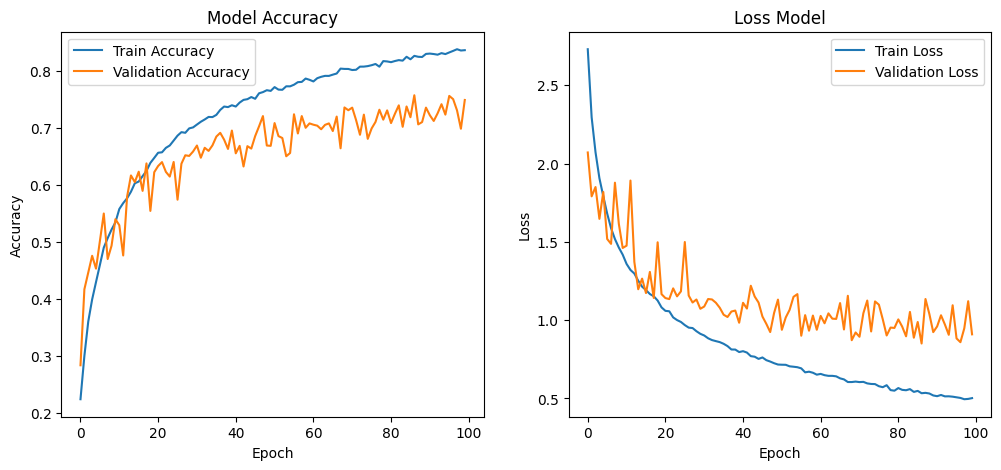

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Konversi Model**

In [22]:
saved_model_dir = './saved_model/my_model'
tf.saved_model.save(model, saved_model_dir)

In [23]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.experimental_new_converter = True

converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

tflite_model = converter.convert()

tflite_dir = './tflite'
if not os.path.exists(tflite_dir):
    os.makedirs(tflite_dir)

with open(os.path.join(tflite_dir, 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

In [24]:
label_path = os.path.join(tflite_dir, 'label.txt')
with open(label_path, 'w') as f:
    for label, index in train_generator.class_indices.items():
        f.write(f"{index}:{label}\n")

print("Model berhasil disimpan sebagai SavedModel dan TF-Lite.")

Model berhasil disimpan sebagai SavedModel dan TF-Lite.


In [34]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras best_model_revised.h5 tfjs_model

2025-04-26 14:29:12.142746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745677752.162335   65161 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745677752.168415   65161 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


# **Inference**

In [36]:
def load_and_preprocess_image(image_path, target_size=TARGET_SIZE):
    img = Image.open(image_path).resize(target_size)
    img = np.array(img) / 255.0
    if img.ndim == 2:
        img = np.stack((img,)*3, axis=-1)
    elif img.shape[-1] == 4:
        img = img[..., :3]
    return np.expand_dims(img.astype(np.float32), axis=0)

interpreter = tflite.Interpreter(model_path=os.path.join(tflite_dir, 'model.tflite'))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [37]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter.experimental_new_converter = True

converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

tflite_model = converter.convert()
with open(os.path.join(tflite_dir, 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpf5kt_86i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137899567604240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899572527760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899566540432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899566540240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899567603472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899566539280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899566539472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899566541200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899566541584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137899566539664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1378995665413

In [38]:
sample_image_path = os.path.join(DATASET_PATH, 'test', 'Fries', 'Fries-Test (32).jpeg')
input_data = load_and_preprocess_image(sample_image_path)

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

predictions = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(predictions[0])

print(f"Prediksi Kelas untuk Sample Image: {predicted_class}")
print("Mapping Label Kelas:")
print(train_generator.class_indices)

Prediksi Kelas untuk Sample Image: 4
Mapping Label Kelas:
{'Baked Potato': 0, 'Burger': 1, 'Crispy Chicken': 2, 'Donut': 3, 'Fries': 4, 'Hot Dog': 5, 'Pizza': 6, 'Sandwich': 7, 'Taco': 8, 'Taquito': 9}


In [39]:
def download_folder_and_files(folder_path, download_name="downloaded_files.zip"):
  """Downloads the specified folder and its contents as a zip file.

  Args:
    folder_path: The path to the folder you want to download.
    download_name: The name of the zip file to create.
  """

  shutil.make_archive(download_name.split('.')[0], 'zip', folder_path)
  files.download(download_name.split('.')[0] + '.zip')

In [40]:
folder_to_download = "/content/tflite"

In [41]:
download_folder_and_files(folder_to_download, "tflite_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
download_folder_and_files("/content/saved_model", "saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
download_folder_and_files("/content/tfjs_model", "tfjs_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
files.download("best_model_revised.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>